# Principle Component Analysis
This notebook will implement Principle Component Analysis with the [IBMEmployeeAttrition](https://github.com/Madison-Bunting/INDE-577/blob/main/IBMEmployeeAttrition.csv) dataset.

In [218]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

#importing the dataset as a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/IBMEmployeeAttrition.csv")

## Pre-Processing
Before we can run PCA, we need to pre-process the data and encode labels. 

Transform categorical data into numerical values, so they can still be used in analysis (as uncovered in the [Exploring A New Dataset](https://github.com/Madison-Bunting/INDE-577/blob/main/Exploring%20a%20New%20Dataset.ipynb) Notebook.

In [219]:
def transform(feature):
    le=preprocessing.LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [220]:
#Pull out the categorical variables
cat_df=df.select_dtypes(include='object')
cat_df.columns

#encode the categorical columns
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['Y']
['No' 'Yes']


The next step is to select which features we want to use with PCA and standardize them.

In [221]:
#Standardizing features
sc = StandardScaler()
X = sc.fit_transform(df.drop('MonthlyIncome',axis=1))
y = df['MonthlyIncome'].to_numpy()

#Confirm the new mean and standard deviation of the dataset
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


## Split into Train and Test data
To apply PCA, the data must be split into "training" and "test" data.

In [222]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 40)

We can decide the number of components we need in the output, but it is more effictive to specify the minimum variation that we want to be retained and allow the model to provide the number of components.

In [223]:
# Make an instance of the model and specify that 90% of the variance needs to be retained
n = 90
pca = PCA(n/100)

#Fit the model with data
pca.fit(X_train)

print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')

To retain 90 % of the variation, we needed 22 components


In [224]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(1102, 22)
(368, 22)


## Impact Comparison across Regressors

LinearRegression() PCA:  LinearRegression()  MSE:  6654358.6755
KNeighborsRegressor(n_neighbors=4) PCA:  KNeighborsRegressor(n_neighbors=4)  MSE:  10482646.83611
DecisionTreeRegressor(max_depth=4) PCA:  DecisionTreeRegressor(max_depth=4)  MSE:  13082814.06994
SVR() PCA:  SVR()  MSE:  26399711.5622


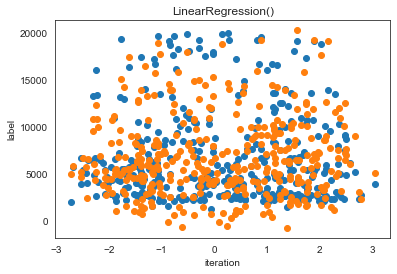

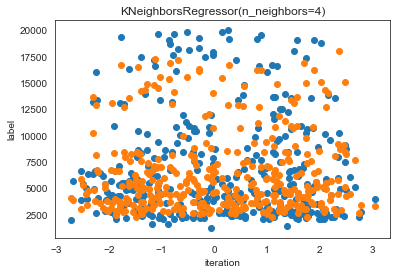

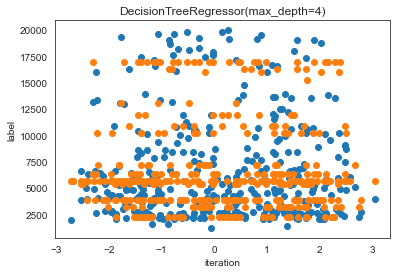

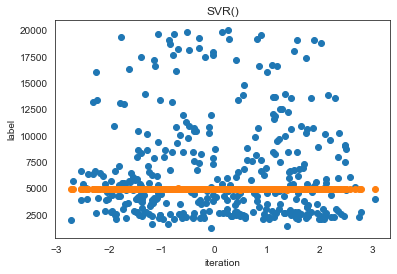

In [225]:
#Load models
lin_reg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=4)
dt = DecisionTreeRegressor(max_depth=4)
svm = SVR()

models = [lin_reg,knn,dt,svm]

#Visualize each model
for model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    print(model, "PCA: ", model," MSE: ", np.round(mean_squared_error(y_test, y_pred),5))
    for i in range(1, X_test_pca.shape[1]):
        if i == 1:
            fig,ax = plt.subplots(1,1)
            ax.scatter(X_test_pca[:,i], y_test, label = 'predicted')
            ax.scatter(X_test_pca[:,i], y_pred, label = 'actual')
            ax.set_title(model)
            ax.set_xlabel('iteration')
            ax.set_ylabel('label')

Linear regression and knn did a decent job of matching the training data. As expected, decision tree produced results in lines with each level of the tree. PCA significantly negatively impacted SVM's ability to predict outcomes.

## Impact Comparison across Classifiers

The algorithm is implemented at the end of the notebooks below: 
- [Logistic Regression](https://github.com/Madison-Bunting/INDE-577/tree/main/supervised%20learning/2%20-%20logistic%20regression)
- [K Nearest Neighbors](https://github.com/Madison-Bunting/INDE-577/tree/main/supervised%20learning/5%20-%20K%20nearest%20neighbors)
- [Naive Bayes Classifier](https://github.com/Madison-Bunting/INDE-577/blob/main/supervised%20learning/6%20-%20naive%20bayes%20classifier/README.md)
- [Support Vector Machines](https://github.com/Madison-Bunting/INDE-577/tree/main/supervised%20learning/7%20-%20support%20vector%20machines)
- [Decision/Regression Trees](https://github.com/Madison-Bunting/INDE-577/tree/main/supervised%20learning/8%20-%20decision-regression%20trees)
- [Ensemble Learning](https://github.com/Madison-Bunting/INDE-577/tree/main/supervised%20learning/9%20-%20ensemble%20learning)

The data below was pulled from the results in those notebooks so it is easier to visualize the impact of PCA with different algorithms. The focus of this comparison is more on the final accuracy and time the algorithm takes, rather than the visually comparing the datapoints (as in the regression comparison above).

In [212]:
accuracy = {'Model': ['Logistic Regression', 'Decision Tree - Gini', 'Decision Tree - Entropy', 'K Nearest Neighbors', 'Naive Bayes', 'SVM', 'Random Forest'], 
               'Accuracy - no PCA (%)': [90, 85, 85, 85, 87, 87, 86], 
               'Accuracy - PCA (%)': [88, 84, 84, 86, 88, 86, 85]
              }

acc = pd.DataFrame(data=accuracy)
acc

,Model,Accuracy - no PCA (%),Accuracy - PCA (%)
0,Logistic Regression,90,88
1,Decision Tree - Gini,85,84
2,Decision Tree - Entropy,85,84
3,K Nearest Neighbors,85,86
4,Naive Bayes,87,88
5,SVM,87,86
6,Random Forest,86,85


In [213]:
acc = acc.set_index('Model')

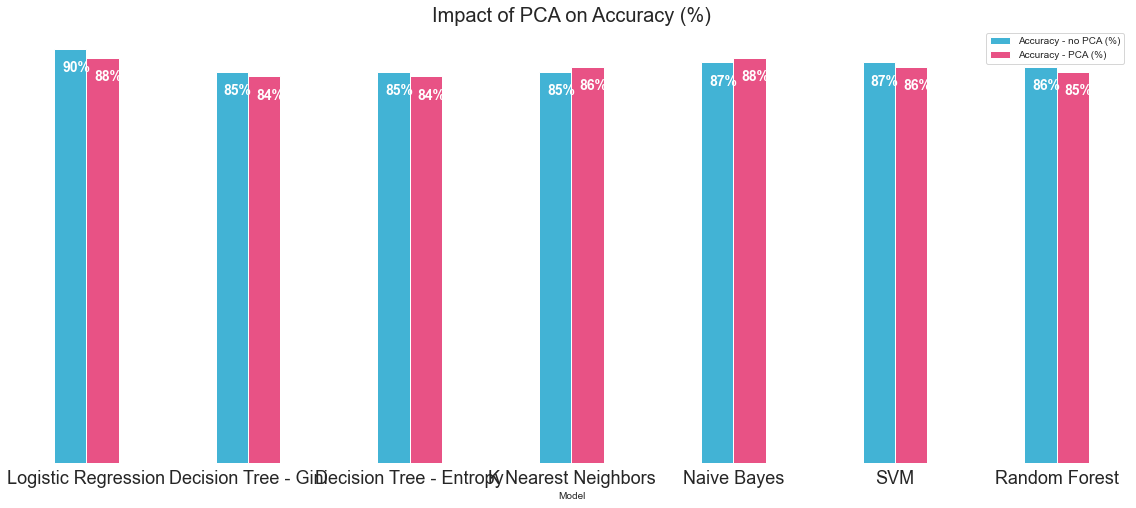

In [214]:
sns.set_style(style='white')
ax = acc.plot(kind='bar', figsize=(20,8), width=0.4, color=['#42b3d5', '#e85285'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Accuracy (%)', fontsize=20)

for n in range(2):
    for index, val in enumerate(acc.iloc[:,n].transpose()): 
        label=str(val) + '%'
        
        if n==0:
            ax.annotate(label, xy=(index-0.15, val-5), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index+0.05, val-5), color='#ffffff', fontsize=14, fontweight='bold')

plt.show()

In logistic regression, decision tree (gini and entropy), SVM, and random forest, the accuracy decreases slightly after PCA. In KNN nad naive bayes, accuracy increases slightly.

In [215]:
time = {'Model': ['Logistic Regression', 'Decision Tree - Gini', 'Decision Tree - Entropy', 'K Nearest Neighbors', 'Naive Bayes', 'SVM', 'Random Forest'],
                  'Train Time - no PCA (s) ': [0.0325, 0.0105, 0.0113, 0.0147, 0.0040, 0.3665, 0.5382],
                  'Train Time - PCA (s) ': [0.0150, 0.0112, 0.0140, 0.0105, 0.0030, 0.3492, 0.7902]}

tm = pd.DataFrame(data=time)
tm

,Model,Train Time - no PCA (s),Train Time - PCA (s)
0,Logistic Regression,0.0325,0.0150
1,Decision Tree - Gini,0.0105,0.0112
2,Decision Tree - Entropy,0.0113,0.0140
3,K Nearest Neighbors,0.0147,0.0105
4,Naive Bayes,0.0040,0.0030
5,SVM,0.3665,0.3492
6,Random Forest,0.5382,0.7902


In [216]:
tm = tm.set_index('Model')

Text(0.5, 1.0, 'Impact of PCA on Train Time (Seconds)')

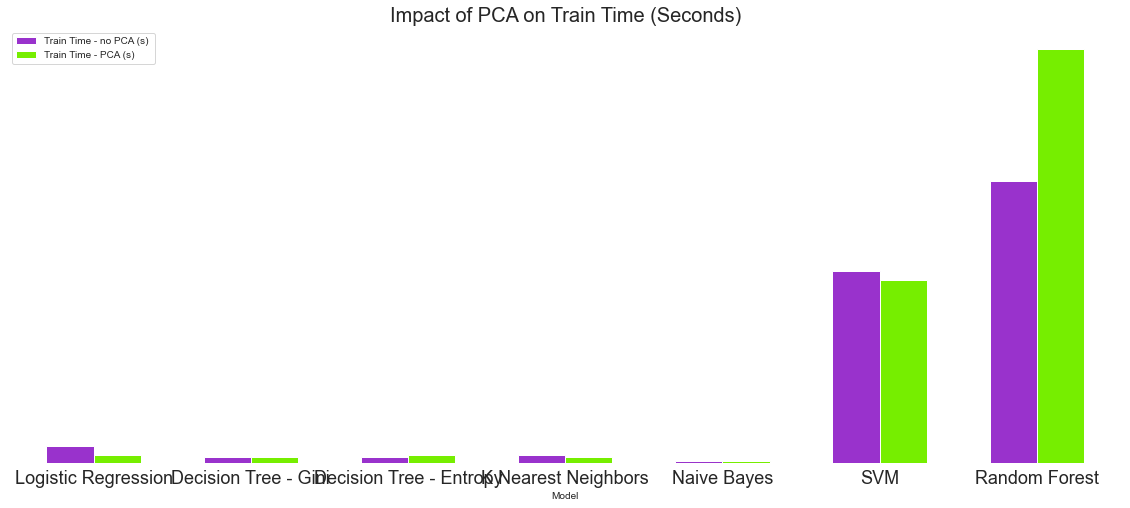

In [217]:
ax = tm.plot(kind='bar', figsize=(20,8), width=0.6, color=['#9932CC', '#76EE00'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Train Time (Seconds)', fontsize=20)



In logistic regression, KNN, naive bayes, and SVM, train time improved with PCA.
In decision tree (both algorithms) and random forest, train time increases after PCA.